# __Question (V)__:

$$ E(r, \theta, \phi, t) = A \sin \theta \left[ \cos(kr - \omega t) - kr \sin(kr - \omega t) \right] \hat{\phi}$$

In [88]:
from sympy import symbols, sin, cos, Function, simplify,integrate, diff, pi,sqrt
from sympy.vector import CoordSys3D, curl, dot, express
from sympy.vector import Del

In [3]:
# Define symbols
r, theta, phi, t, k, A = symbols('r theta phi t k A', real=True)
omega = symbols('omega', positive=True)
kr = k * r
phase = kr - omega * t

# Define spherical coordinate system
N = CoordSys3D('N', transformation='spherical', variable_names=('r', 'theta', 'phi'))

# Define the φ-component of the electric field
E_phi_expr = A * sin(theta) * (cos(phase) - (1/(kr)) * sin(phase))

# Define the vector field (only φ-component)
E = E_phi_expr * N.base_vectors()[2]  # φ̂ is the third base vector in spherical

# Define the del operator
delop = Del()

In [4]:
# Compute the curl
curl_E = delop.cross(E)

# Express result in spherical coordinates
curl_E_spherical = express(curl_E, N, variables=True)

# Simplify the result
simplified_curl_E = simplify(curl_E_spherical)

print("∇ × E (in spherical coordinates):")
simplified_curl_E

∇ × E (in spherical coordinates):


(A*(k*r*cos(k*r - omega*t) - sin(k*r - omega*t))*sin(theta)*cos(N.theta)/(N.r*k*r*sin(N.theta)))*N.i + (-A*(k*r*cos(k*r - omega*t) - sin(k*r - omega*t))*sin(theta)/(N.r*k*r))*N.j

In [5]:
B = integrate(simplified_curl_E,t).doit().simplify()
B

(-A*(k*r*sin(k*r - omega*t) + cos(k*r - omega*t))*sin(theta)/(N.r*k*omega*r*tan(N.theta)))*N.i + (A*(k*r*sin(k*r - omega*t) + cos(k*r - omega*t))*sin(theta)/(N.r*k*omega*r))*N.j

In [6]:
# Compute the curl
Div_B = delop.dot(B)

# Express result in spherical coordinates
Div_B_spherical = express(Div_B, N, variables=True)

# Simplify the result
simplified_Div_B = simplify(Div_B_spherical)

print("∇ . B (in spherical coordinates):")
simplified_Div_B

∇ . B (in spherical coordinates):


0

In [7]:
# Compute the curl
curl_B = delop.cross(B)

# Express result in spherical coordinates
curl_B_spherical = express(curl_B, N, variables=True)

# Simplify the result
simplified_curl_B = simplify(curl_B_spherical)

print("∇ × B (in spherical coordinates):")
simplified_curl_B

∇ × B (in spherical coordinates):


(A*(k*r*sin(k*r - omega*t) + cos(k*r - omega*t))*(-tan(N.theta)**2 - 1)*sin(theta)/(N.r**2*k*omega*r*tan(N.theta)**2))*N.k

In [35]:
S = B.cross(E).simplify()
S

(A**2*(k*r*sin(k*r - omega*t) + cos(k*r - omega*t))*(k*r*cos(k*r - omega*t) - sin(k*r - omega*t))*sin(theta)**2/(N.r*k**2*omega*r**2))*N.i + (A**2*(k*r*sin(k*r - omega*t) + cos(k*r - omega*t))*(k*r*cos(k*r - omega*t) - sin(k*r - omega*t))*sin(theta)**2/(N.r*k**2*omega*r**2*tan(N.theta)))*N.j

In [49]:
S_squared = S.dot(S)
T = 2 * pi / omega
S_avg = (1/T) * integrate(S_squared, (t, 0, T))
S_avg.simplify()

A**4*(k**2*r**2 + 1)**2*sin(theta)**4/(8*N.r**2*k**4*omega**2*r**4*sin(N.theta)**2)

In [10]:
E_dash = diff(E, t).simplify()
E_dash

(A*omega*(k*r*sin(k*r - omega*t) + cos(k*r - omega*t))*sin(theta)/(k*r))*N.k

# __Question (II):__

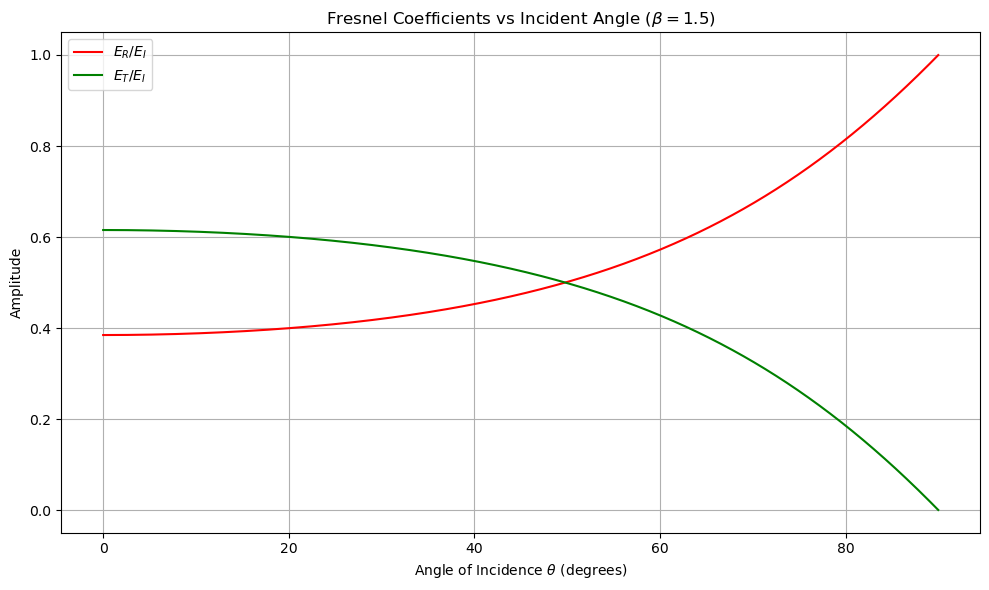

In [80]:
import numpy as np
import matplotlib.pyplot as plt

# Angle range (0.01° to 89.99° to avoid division by zero at 90°)
theta_deg = np.linspace(0.01, 89.99, 1000)
theta_rad = np.radians(theta_deg)

# Given beta
beta = 1.5

# Calculate alpha(theta)
alpha = np.sqrt(beta**2 - np.sin(theta_rad)**2) / np.cos(theta_rad)

# Fresnel equations
E_I = 1  # Assume incident field amplitude is 1 for visualization

E_R = np.abs(((1 - alpha * beta) / (1 + alpha * beta))) * E_I
E_T = np.abs((2 / (1 + alpha * beta))) * E_I

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(theta_deg, E_R, label=r"$E_R / E_I$", color='red')
plt.plot(theta_deg, E_T, label=r"$E_T / E_I$", color='green')

plt.xlabel(r"Angle of Incidence $\theta$ (degrees)")
plt.ylabel("Amplitude")
plt.title(r"Fresnel Coefficients vs Incident Angle ($\beta = 1.5$)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


In [100]:
theta, beta, E_I = symbols('theta beta E_I', real=True, positive=True)
alpha = sqrt(beta**2 - sin(theta)**2) / cos(theta)

E_R = ((1 - alpha * beta) / (1 + alpha * beta)) * E_I
E_T = (2 / (1 + alpha * beta)) * E_I

R = (E_R/E_I)**2
T = (alpha * beta) * (E_T/E_I)**2
I = R + T 
I.simplify()

1